# HPP - project

## Setup

In [94]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from sklearn.preprocessing import OneHotEncoder
import xgboost

# read in all our data
train_df = pd.read_csv("../train.csv")
# set seed for reproducibility
np.random.seed(0)

#Delete ID column
train_df.drop(['Id'], axis=1, inplace=True)

## Data Preprocessing
In this section we are going to identify and deal with missing values. 

In [95]:
#Get the number of missing data points per column
missing_values_count = train_df.isnull().sum()
#Get columns with at least one missing data point
columns_with_missing_data = missing_values_count[missing_values_count > 0]

print(columns_with_missing_data)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


### Dropping columns
We will drop columns which are missing more than 80% missing values because TODO: insert source here

In [96]:
#First determine the shape of the dataset
train_df.shape


(1460, 80)

In [97]:
#Create list of columns which miss more values than 80%.
columns_to_drop = missing_values_count[missing_values_count > 0.8*1460].index

train_df.drop(columns=columns_to_drop, inplace=True)
train_df.shape

(1460, 76)

In [98]:
# Numeric
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())

# Categorical
train_df['MasVnrType'] = train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])
train_df['BsmtQual'] = train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])
train_df['BsmtCond'] = train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode()[0])
train_df['GarageType'] = train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])
train_df['GarageFinish'] = train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0])
train_df['GarageQual'] = train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])
train_df['GarageCond'] = train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])

# Check that we have no NA values.
missing_values_count = train_df.isnull().sum()
columns_with_missing_data = missing_values_count[missing_values_count > 0]
print(columns_with_missing_data)

Series([], dtype: int64)


Handle Categorical Features

## EDA

In [99]:
# for i in continous_column:
#     plt.figure(figsize=(10,5))
#     sns.boxplot(data=train_df,y=i)
#     plt.title(f" Box plot for {i}")
#     plt.ylabel(i)
#     plt.show()

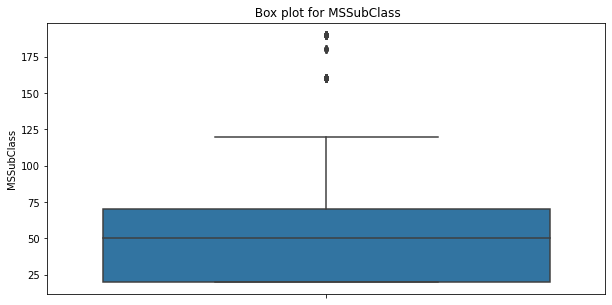

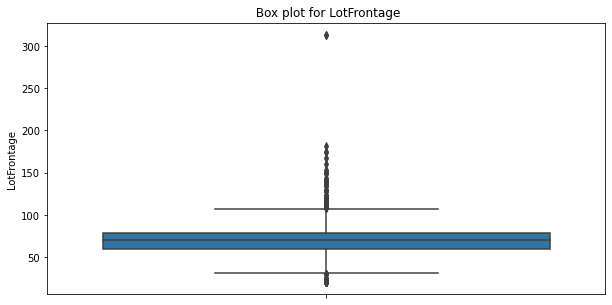

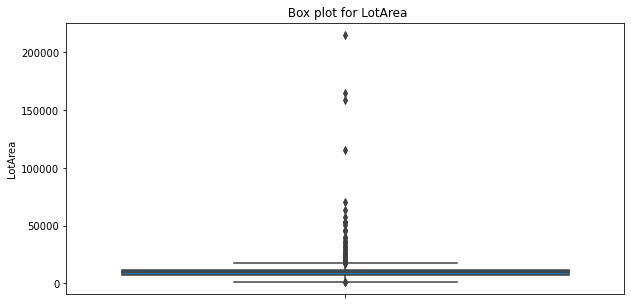

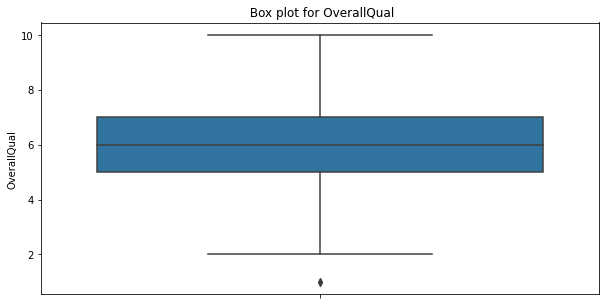

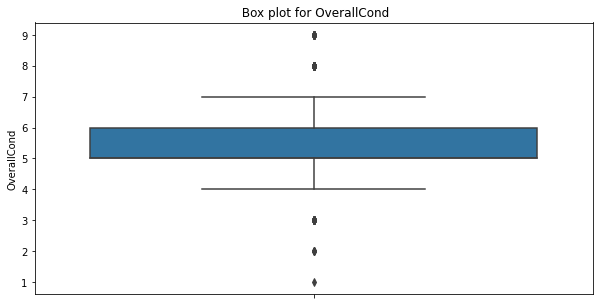

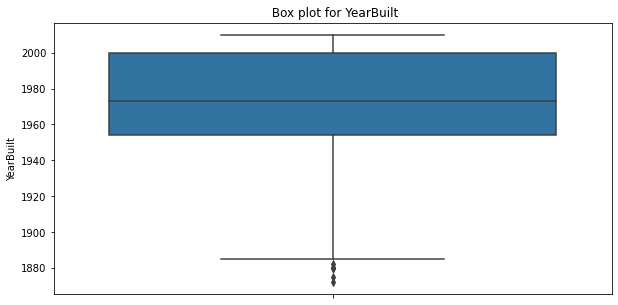

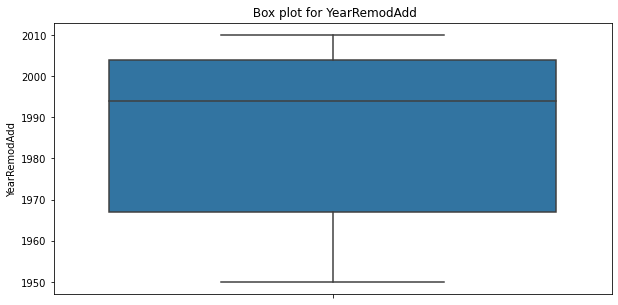

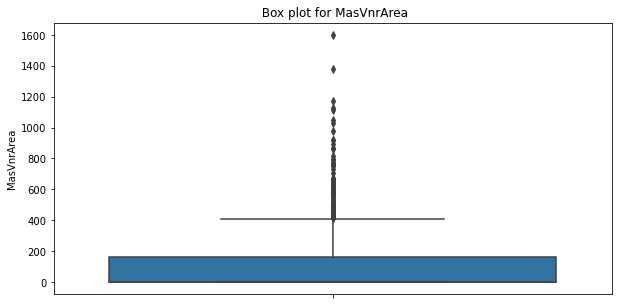

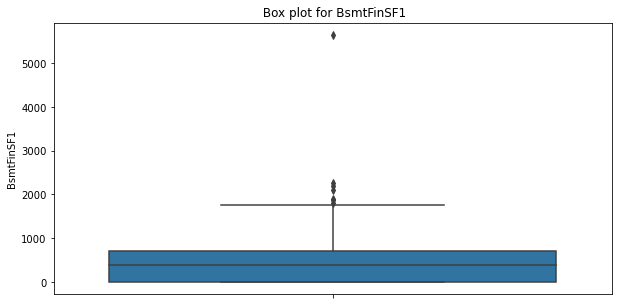

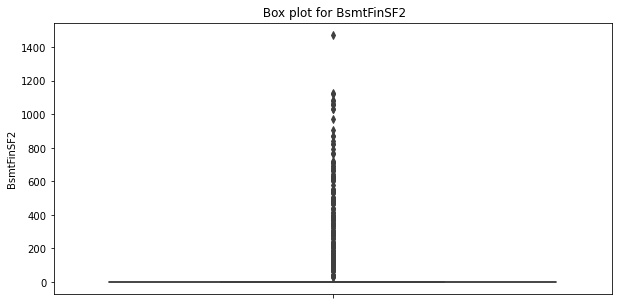

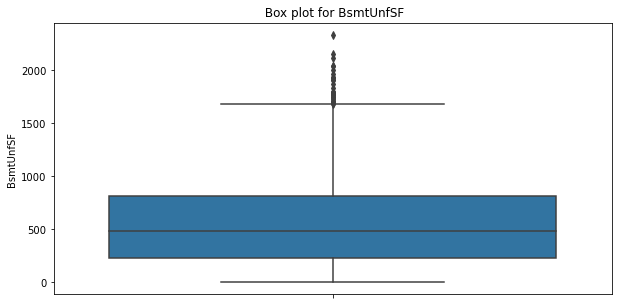

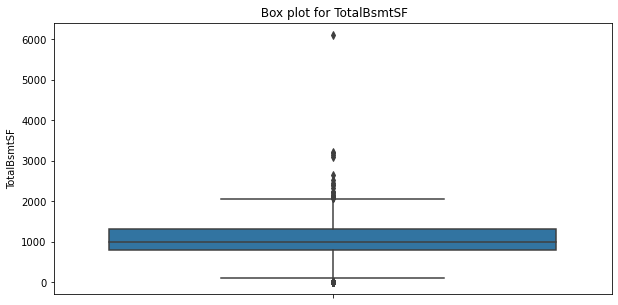

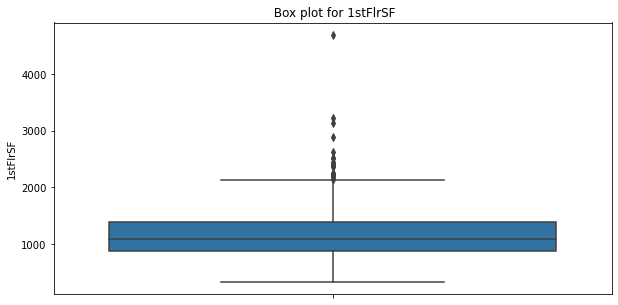

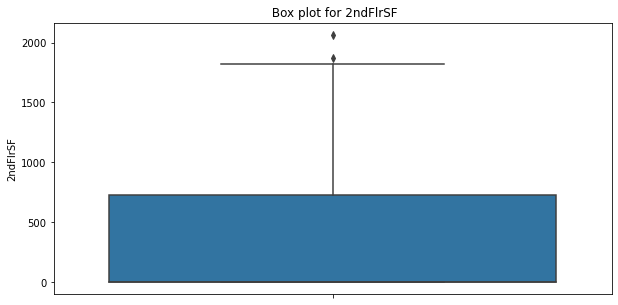

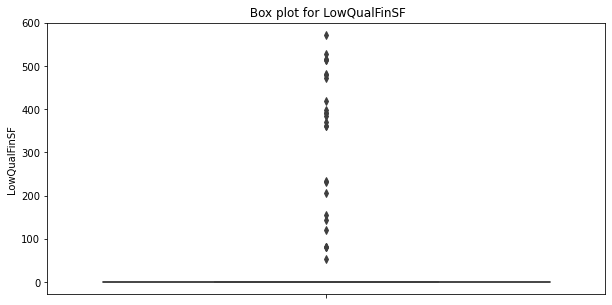

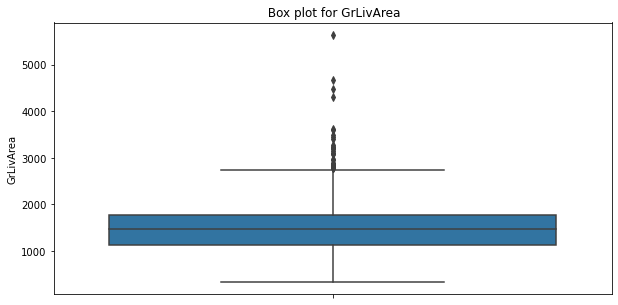

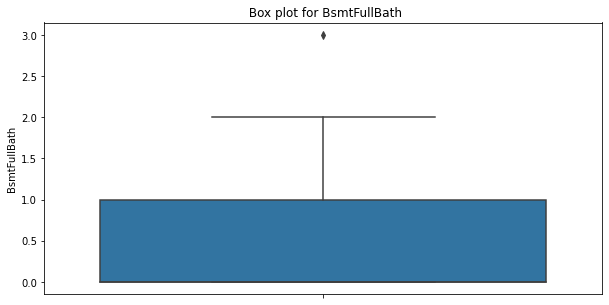

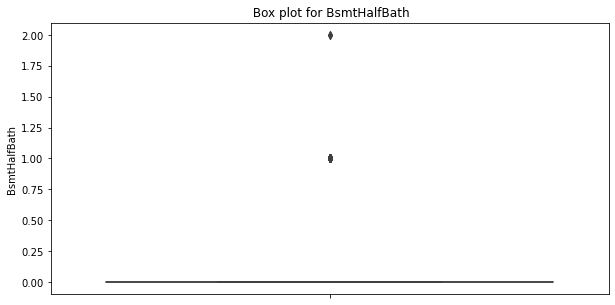

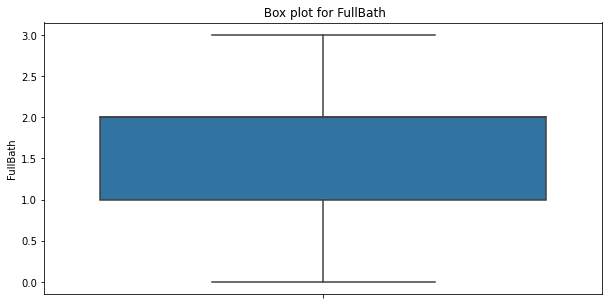

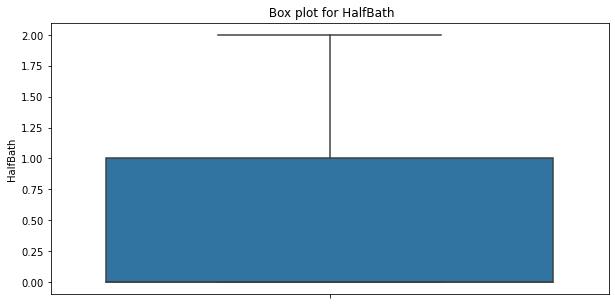

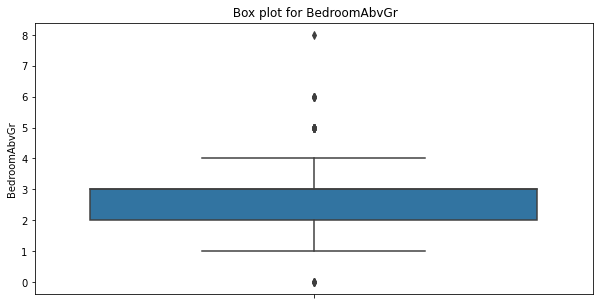

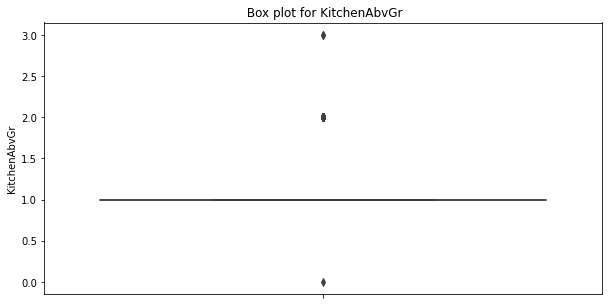

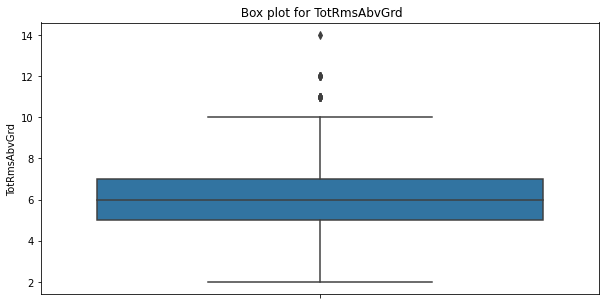

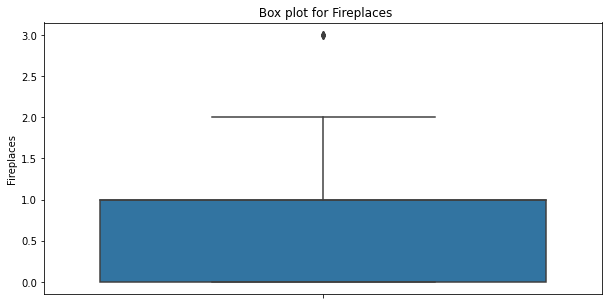

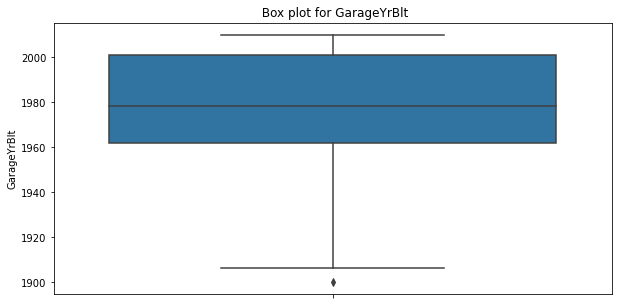

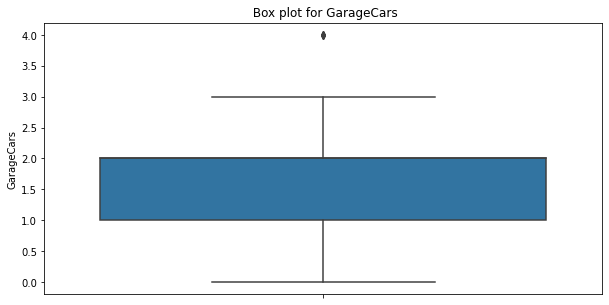

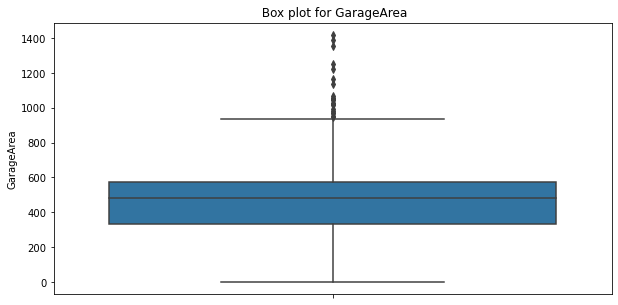

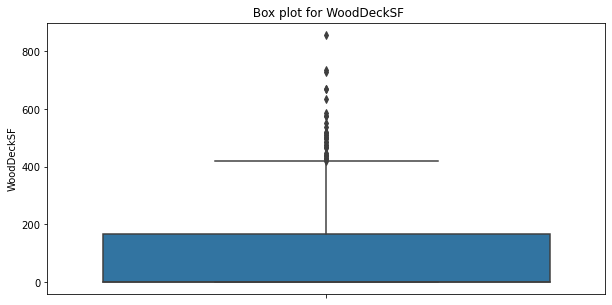

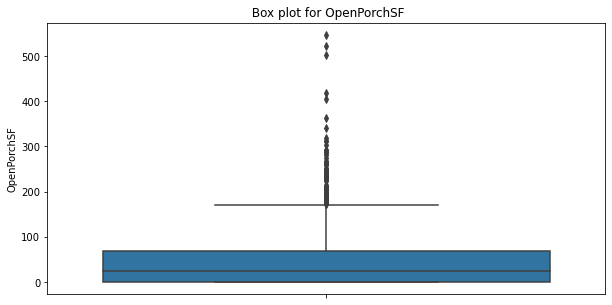

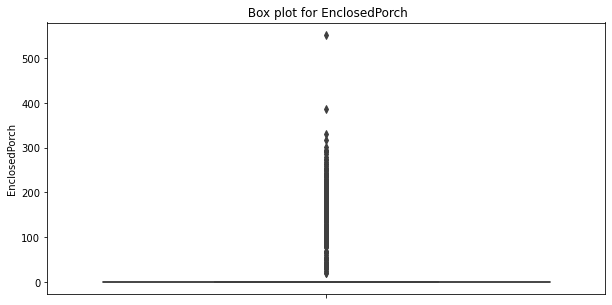

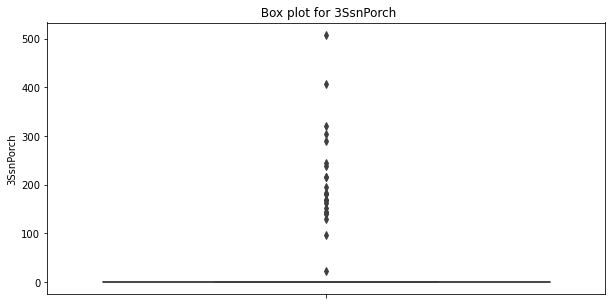

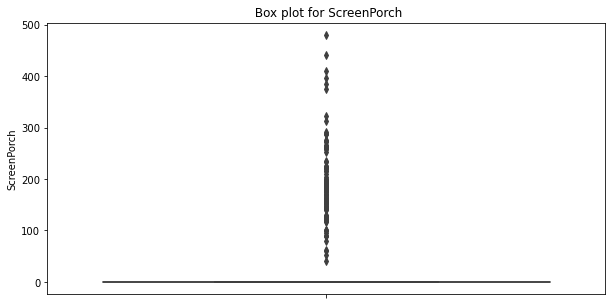

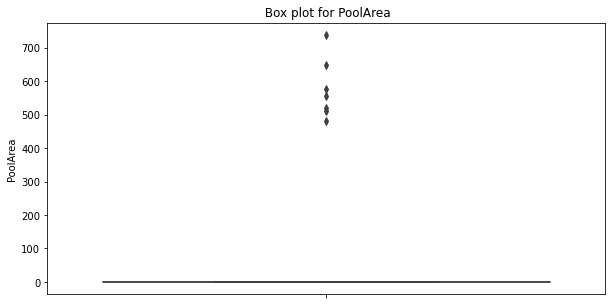

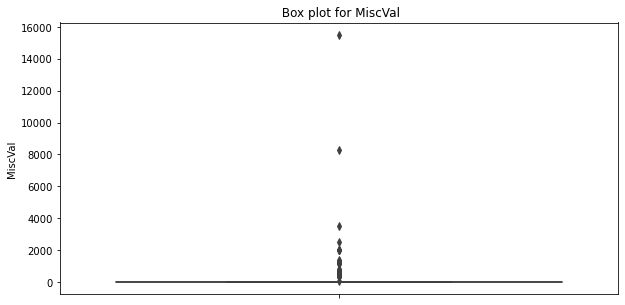

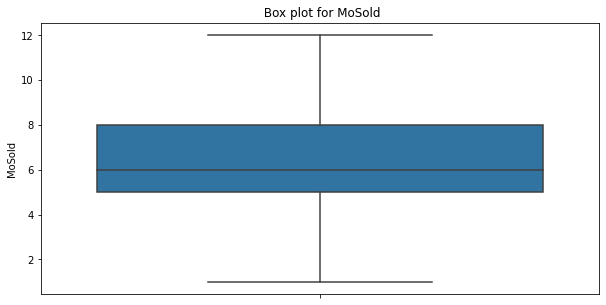

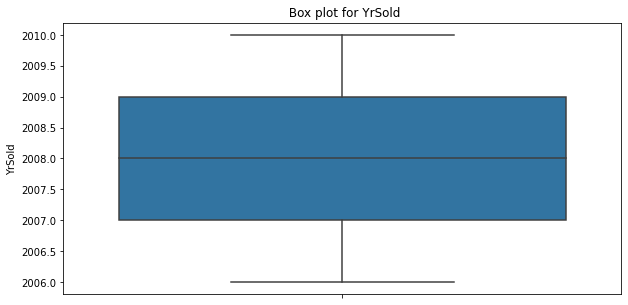

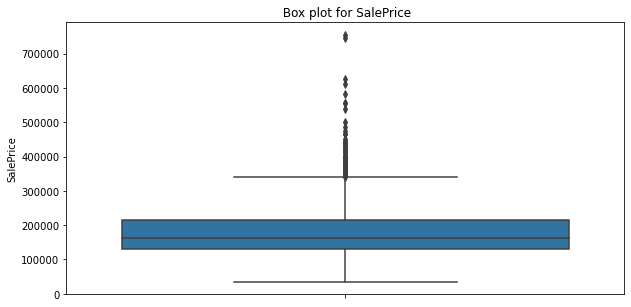

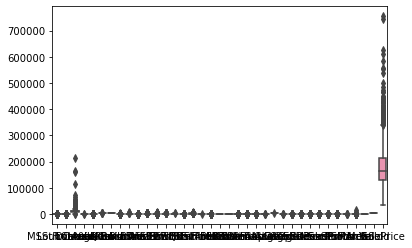

In [111]:
continuous_column = train_df.select_dtypes(include=[np.number]).columns.tolist()

for i in continuous_column:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=train_df,y=i)
    plt.title(f" Box plot for {i}")
    plt.ylabel(i)
    plt.show()

sns.boxplot(data=train_df)
plt.show()

## Test data

## Concatenation

In [101]:
test_df = pd.read_csv('processed_test_df')

train_test_df = pd.concat([train_df,test_df],axis=0)


train_df.shape

train_test_df['SalePrice'].info



<bound method Series.info of 0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64>

## Encoding

In [102]:
# Identify categorical columns
categorical_columns = train_test_df.select_dtypes(include=['object']).columns

# Preprocess the data to ensure categorical columns contain only strings
train_test_df[categorical_columns] = train_test_df[categorical_columns].astype(str)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')

# Fit and transform the categorical data using one-hot encoding
X_encoded = encoder.fit_transform(train_test_df[categorical_columns])

# Get the feature names
feature_names = encoder.get_feature_names_out(input_features=categorical_columns)
print(feature_names)
# Create a DataFrame with the one-hot encoded features
X_encoded_train_test_df = pd.DataFrame(X_encoded, columns=feature_names)

# Reset the index of both DataFrames
X_encoded_train_test_df.reset_index(drop=True, inplace=True)
train_test_df.reset_index(drop=True, inplace=True)

# Combine the one-hot encoded features with the original numerical features
train_test_df = pd.concat([X_encoded_train_test_df, train_test_df.drop(categorical_columns, axis=1)], axis=1)

train_test_df





['MSZoning_FV' 'MSZoning_RH' 'MSZoning_RL' 'MSZoning_RM' 'Street_Pave'
 'LotShape_IR2' 'LotShape_IR3' 'LotShape_Reg' 'LandContour_HLS'
 'LandContour_Low' 'LandContour_Lvl' 'Utilities_NoSeWa'
 'LotConfig_CulDSac' 'LotConfig_FR2' 'LotConfig_FR3' 'LotConfig_Inside'
 'LandSlope_Mod' 'LandSlope_Sev' 'Neighborhood_Blueste'
 'Neighborhood_BrDale' 'Neighborhood_BrkSide' 'Neighborhood_ClearCr'
 'Neighborhood_CollgCr' 'Neighborhood_Crawfor' 'Neighborhood_Edwards'
 'Neighborhood_Gilbert' 'Neighborhood_IDOTRR' 'Neighborhood_MeadowV'
 'Neighborhood_Mitchel' 'Neighborhood_NAmes' 'Neighborhood_NPkVill'
 'Neighborhood_NWAmes' 'Neighborhood_NoRidge' 'Neighborhood_NridgHt'
 'Neighborhood_OldTown' 'Neighborhood_SWISU' 'Neighborhood_Sawyer'
 'Neighborhood_SawyerW' 'Neighborhood_Somerst' 'Neighborhood_StoneBr'
 'Neighborhood_Timber' 'Neighborhood_Veenker' 'Condition1_Feedr'
 'Condition1_Norm' 'Condition1_PosA' 'Condition1_PosN' 'Condition1_RRAe'
 'Condition1_RRAn' 'Condition1_RRNe' 'Condition1_RRNn' 'Condi

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,NaN
2915,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,24,0,0,0,0,0,4,2006,NaN
2916,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,474,0,0,0,0,0,0,9,2006,NaN
2917,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,80,32,0,0,0,0,700,7,2006,NaN


## Split

In [103]:
train_test_df.iloc[1460]

MSZoning_FV       0.0
MSZoning_RH       1.0
MSZoning_RL       0.0
MSZoning_RM       0.0
Street_Pave       1.0
                ...  
PoolArea          0.0
MiscVal           0.0
MoSold            6.0
YrSold         2010.0
SalePrice         NaN
Name: 1460, Length: 237, dtype: float64

In [104]:
train_test_df.rename(columns={'MSZoning_C (all)': 'MSZoning_C'}, inplace=True)

HPP_data_Train = train_test_df.iloc[:1460,:]
HPP_data_Test = train_test_df.iloc[1460:,:]
HPP_data_Test.drop(['SalePrice'],axis=1,inplace=True)


X_train= HPP_data_Train.drop(['SalePrice'],axis=1)
y_train= HPP_data_Train['SalePrice']


/var/folders/3q/1zyht42n1v9767scrnt3hmcc0000gn/T/ipykernel_83657/17740031.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HPP_data_Test.drop(['SalePrice'],axis=1,inplace=True)


In [105]:
classifier = xgboost.XGBRegressor()
classifier.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [106]:
# import pickle
# filename = 'finalized_model.pkl'
# pickle.dump(classifier, open(filename, 'wb'))

In [107]:
y_pred = classifier.predict(HPP_data_Test)
print(y_pred)

[125091.15  158932.67  187207.66  ... 155551.44  111491.125 207938.86 ]


In [108]:
pred=pd.DataFrame(y_pred)
# Create a DataFrame with 'Id' values (1461 to N+1460) and the 'SalePrice' values from 'pred'
pred['Id'] = range(1461, 1461 + len(pred))
pred = pred.rename(columns={0: 'SalePrice'})

# Create a new DataFrame with columns named "Id" and "SalePrice"
result_df = pred[['Id', 'SalePrice']]

# Save the DataFrame to a CSV file
result_df.to_csv('predicted_saleprice.csv', index=False)